In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("marketing_campaign_data.csv", index_col=0)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,5,0,0,0,0,0,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64 

In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2.216000e+03,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,5.224725e+07,0.444196,0.506250,49.109375,3.039357e+05,26302.232143,1.669500e+05,37525.446429,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,2.517308e+07,0.538398,0.544538,28.962453,3.365974e+05,39773.433765,2.257154e+05,54628.979403,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1.730000e+06,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,3.530300e+07,0.000000,0.000000,24.000000,2.375000e+04,1000.000000,1.600000e+04,3000.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,5.138150e+07,0.000000,0.000000,49.000000,1.735000e+05,8000.000000,6.700000e+04,12000.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,6.852200e+07,1.000000,1.000000,74.000000,5.042500e+05,33000.000000,2.320000e+05,50000.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,6.666660e+08,2.000000,2.000000,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


# Task 1
- Melakukan feature engineering: conversion rate
- Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
- Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
- Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

##### Feature Engineering: Conversion Rate & Others

In [5]:
df["Total_Interactions"] = (
    df["NumWebVisitsMonth"]
    + df["NumWebPurchases"]
    + df["NumCatalogPurchases"]
    + df["NumStorePurchases"]
    + df["NumDealsPurchases"]
)

df["Conversion_Rate"] = df["Response"] / df["Total_Interactions"].replace(0, 1)

In [6]:
# Customer Value Index
df["Total_Spending"] = (
    df["MntCoke"]
    + df["MntFruits"]
    + df["MntMeatProducts"]
    + df["MntFishProducts"]
    + df["MntSweetProducts"]
    + df["MntGoldProds"]
)

# Family Size
df["Family_Size"] = df["Kidhome"] + df["Teenhome"] + 1

# Recency Segment
def recency_segment(x):
    if x <= 30:
        return "Recent"
    elif x <= 90:
        return "Medium"
    else:
        return "Old"

df["Recency_Segment"] = df["Recency"].apply(recency_segment)

# Income per Capita
df["Income_per_Capita"] = df["Income"] / df["Family_Size"]

# Channel Preference 
def preferred_channel(row):
    purchases = {
        "Web": row["NumWebPurchases"],
        "Catalog": row["NumCatalogPurchases"],
        "Store": row["NumStorePurchases"],
    }
    return max(purchases, key=purchases.get)

df["Preferred_Channel"] = df.apply(preferred_channel, axis=1)

# Loyalty Indicator  
df["Loyalty_Score"] = (
    df["AcceptedCmp1"]
    + df["AcceptedCmp2"]
    + df["AcceptedCmp3"]
    + df["AcceptedCmp4"]
    + df["AcceptedCmp5"]
)

# Tenure
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")

reference_date = df["Dt_Customer"].max()
df["Customer_Tenure_Months"] = ((reference_date - df["Dt_Customer"]).dt.days) // 30

##### Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok

In [7]:
df["Age"] = 2025 - df["Year_Birth"]
age_conversion = df.groupby("Age")["Response"].mean().reset_index()

bins = [0, 29, 39, 49, 59, 150]
labels = ["<30", "30-39", "40-49", "50-59", "60+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=labels, right=True)

In [8]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Conversion_Rate,Total_Spending,Family_Size,Recency_Segment,Income_per_Capita,Preferred_Channel,Loyalty_Score,Customer_Tenure_Months,Age,Age_Group
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,0.031250,1617000,1,Medium,5.813800e+07,Catalog,0,22,68,60+
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0.000000,27000,3,Medium,1.544800e+07,Store,0,3,71,60+
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0.000000,776000,1,Recent,7.161300e+07,Store,0,10,60,60+
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0.000000,53000,2,Recent,1.332300e+07,Store,0,4,41,40-49
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0.000000,422000,2,Old,2.914650e+07,Store,0,5,44,40-49
5,7446,1967,S2,Bertunangan,62513000.0,0,1,2013-09-09,16,520000,...,0.000000,716000,2,Recent,3.125650e+07,Store,0,9,58,50-59
6,965,1971,S1,Cerai,55635000.0,0,1,2012-11-13,34,235000,...,0.000000,590000,2,Medium,2.781750e+07,Web,0,19,54,50-59
7,6177,1985,S3,Menikah,33454000.0,1,0,2013-05-08,32,76000,...,0.000000,169000,2,Medium,1.672700e+07,Web,0,13,40,40-49
8,4855,1974,S3,Bertunangan,30351000.0,1,0,2013-06-06,19,14000,...,0.066667,46000,2,Recent,1.517550e+07,Web,0,12,51,50-59
9,5899,1950,S3,Bertunangan,5648000.0,1,1,2014-03-13,68,28000,...,0.000000,49000,3,Medium,1.882667e+06,Web,1,3,75,60+


##### Plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign

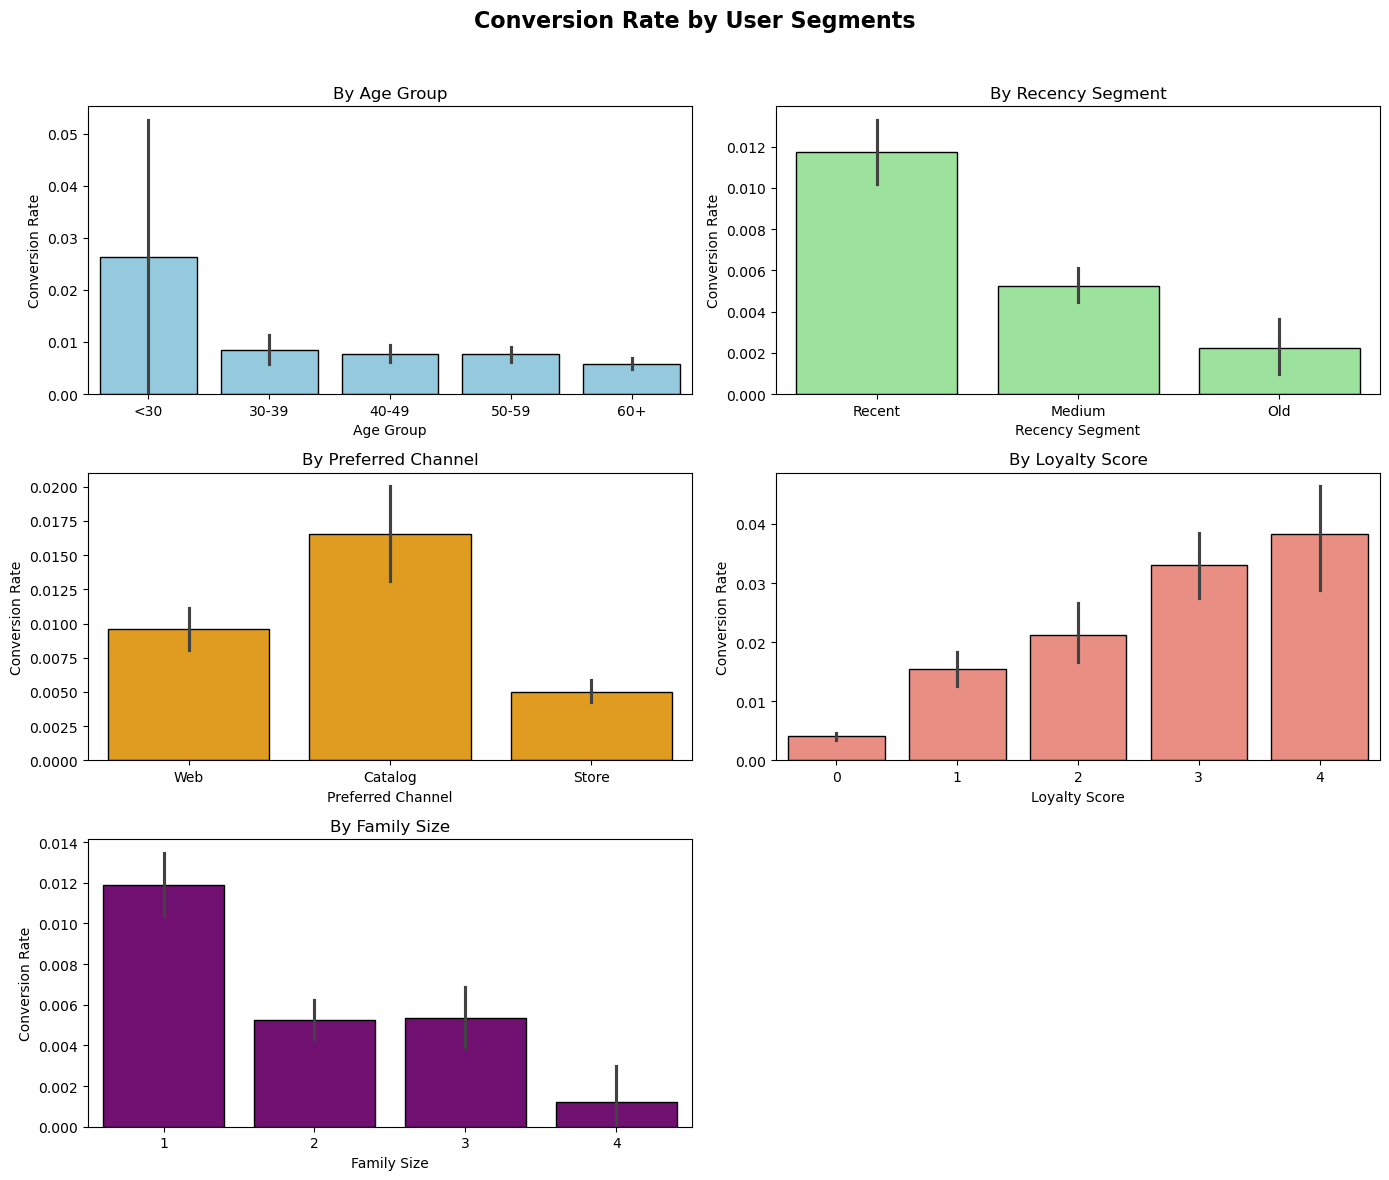

In [9]:
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
fig.suptitle("Conversion Rate by User Segments", fontsize=16, fontweight="bold")

# Age Group
sns.barplot(x="Age_Group", y="Conversion_Rate", data=df,
            color="skyblue", edgecolor="black", ax=axes[0,0])
axes[0,0].set_title("By Age Group")
axes[0,0].set_xlabel("Age Group")
axes[0,0].set_ylabel("Conversion Rate")

# Recency Segment
sns.barplot(x="Recency_Segment", y="Conversion_Rate", data=df,
            order=["Recent","Medium","Old"], color="lightgreen", edgecolor="black", ax=axes[0,1])
axes[0,1].set_title("By Recency Segment")
axes[0,1].set_xlabel("Recency Segment")
axes[0,1].set_ylabel("Conversion Rate")

# Preferred Channel
sns.barplot(x="Preferred_Channel", y="Conversion_Rate", data=df,
            order=["Web","Catalog","Store"], color="orange", edgecolor="black", ax=axes[1,0])
axes[1,0].set_title("By Preferred Channel")
axes[1,0].set_xlabel("Preferred Channel")
axes[1,0].set_ylabel("Conversion Rate")

# Loyalty Score
sns.barplot(x="Loyalty_Score", y="Conversion_Rate", data=df,
            color="salmon", edgecolor="black", ax=axes[1,1])
axes[1,1].set_title("By Loyalty Score")
axes[1,1].set_xlabel("Loyalty Score")
axes[1,1].set_ylabel("Conversion Rate")

# Family Size
sns.barplot(x="Family_Size", y="Conversion_Rate", data=df,
            color="purple", edgecolor="black", ax=axes[2,0])
axes[2,0].set_title("By Family Size")
axes[2,0].set_xlabel("Family Size")
axes[2,0].set_ylabel("Conversion Rate")

# subplot terakhir (kosong)
axes[2,1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


##### Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

**Interpretasi utama**
1. By Age Group
- Customer usia <30 menunjukkan conversion rate lebih tinggi dibanding semua kelompok lain.
- Setelah usia 30 tahun, conversion rate turun drastis dan relatif stabil rendah.
- Kesimpulan: ada hubungan signifikan antara umur dan conversion rate dimana semakin muda customer, semakin besar kemungkinan mereka merespons campaign.

2. By Recency Segment
- Customer yang Recent (belanja dalam 30 hari terakhir) jauh lebih responsif daripada yang Medium/Old.
- Ini konsisten dengan teori marketing: customer aktif lebih mudah diaktivasi kembali.

3. By Preferred Channel
- Catalog buyers punya conversion rate paling tinggi, disusul Web, lalu Store paling rendah.
- Artinya channel komunikasi & promosi perlu diarahkan lebih kuat ke Catalog dan Web users.

4. By Loyalty Score
- Ada tren positif: semakin sering customer menerima/ikut campaign sebelumnya, semakin besar kemungkinan mereka merespons campaign selanjutnya.
- Customer yang sudah pernah ikut 3–4 campaign sebelumnya adalah target terbaik.

5. By Family Size
- Conversion rate tertinggi ada pada single customer (Family Size = 1).
- Semakin besar family size, cenderung lebih rendah respons campaign.
- Ini bisa jadi karena rumah tangga besar lebih price-sensitive atau prioritas belanja berbeda.

**Kesimpulan Utama**
- Umur <30 adalah faktor signifikan: customer muda jauh lebih responsif.
- Selain umur, faktor penting lain: recent activity, catalog/web buyers, high loyalty, single household → mereka adalah jenis user paling potensial untuk ditarget campaign.

# Task 2
- Mengatasi data null dan duplicated
- Membuang data yang tidak diperlukan
- Melakukan feature encoding
- Melakukan standardisasi pada feature

##### Mengatasi data null dan duplicated
Key points:
- Pada pengecekan terlihat bahwa missing terdapat 24 baris missing value pada Income dan Income_per_Capita. Kedua fitur ini dicek mendalam, terutama pada section umur untuk melihat apakah target ini seorang remaja (tidak ada pendapatan) atau tidak.
    - Hasil: Ternyata umur target bervariasi dan memang kedua kolom tersebut tidak terisi dengan benar
    - Solusi: Karena fitur ini dapat dianggap penting, maka dari itu nilai null ini akan di **imputasi**

In [10]:
df = df.drop_duplicates()
print("Missing values before handling:\n", df.isnull().sum().sort_values(ascending=False))

Missing values before handling:
 Income                    24
Income_per_Capita         24
ID                         0
Conversion_Rate            0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Total_Interactions         0
Total_Spending             0
AcceptedCmp4               0
Family_Size                0
Recency_Segment            0
Preferred_Channel          0
Loyalty_Score              0
Customer_Tenure_Months     0
Age                        0
AcceptedCmp5               0
AcceptedCmp3               0
Year_Birth                 0
MntFruits                  0
Education                  0
Marital_Status             0
Kidhome                    0
Teenhome                   0
Dt_Customer                0
Recency                    0
MntCoke                    0
MntMeatProducts            0
NumWebVisitsMonth          0
MntFishProducts            0
MntSweetPr

In [11]:
null_income = df[df['Income'].isnull() | df['Income_per_Capita'].isnull()]
null_income

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Conversion_Rate,Total_Spending,Family_Size,Recency_Segment,Income_per_Capita,Preferred_Channel,Loyalty_Score,Customer_Tenure_Months,Age,Age_Group
10,1994,1983,S1,Menikah,NaN,1,0,2013-11-15,11,5000,...,0.000000,19000,2,Recent,NaN,Store,0,7,42,40-49
27,5255,1986,S1,Lajang,NaN,1,0,2013-02-20,19,5000,...,0.000000,637000,2,Recent,NaN,Web,0,16,39,30-39
43,7281,1959,S3,Lajang,NaN,0,0,2013-11-05,80,81000,...,0.000000,186000,1,Medium,NaN,Store,0,7,66,60+
48,7244,1951,S1,Lajang,NaN,2,1,2014-01-01,96,48000,...,0.000000,124000,4,Old,NaN,Store,0,5,74,60+
58,8557,1982,S1,Lajang,NaN,1,0,2013-06-17,57,11000,...,0.000000,46000,2,Medium,NaN,Store,0,12,43,40-49
71,10629,1973,D3,Menikah,NaN,1,0,2012-09-14,25,25000,...,0.000000,109000,2,Recent,NaN,Web,0,21,52,50-59
90,8996,1957,S3,Menikah,NaN,2,1,2012-11-19,4,230000,...,0.000000,603000,4,Recent,NaN,Store,0,19,68,60+
91,9235,1957,S1,Lajang,NaN,1,1,2014-05-27,45,7000,...,0.000000,18000,3,Medium,NaN,Store,0,1,68,60+
92,5798,1973,S2,Bertunangan,NaN,0,0,2013-11-23,87,445000,...,0.000000,985000,1,Medium,NaN,Store,0,7,52,50-59
128,8268,1961,S3,Menikah,NaN,0,1,2013-07-11,23,352000,...,0.000000,404000,2,Recent,NaN,Store,0,11,64,60+


In [12]:
# Imputasi Income berdasarkan umur
df["Income"] = df.groupby("Age_Group")["Income"].transform(
    lambda x: x.fillna(x.median())
)

# Hitung Income_per_Capita dengan Family_Size
df["Income_per_Capita"] = df["Income"] / df["Family_Size"]

# Imputasi Income_per_Capita yang masih null (kalau ada Family_Size = 0 atau NaN)
df["Income_per_Capita"] = df.groupby("Age_Group")["Income_per_Capita"].transform(
    lambda x: x.fillna(x.median())
)

df.isnull().sum().value_counts()

0    40
Name: count, dtype: int64

##### Membuang data yang tidak diperlukan

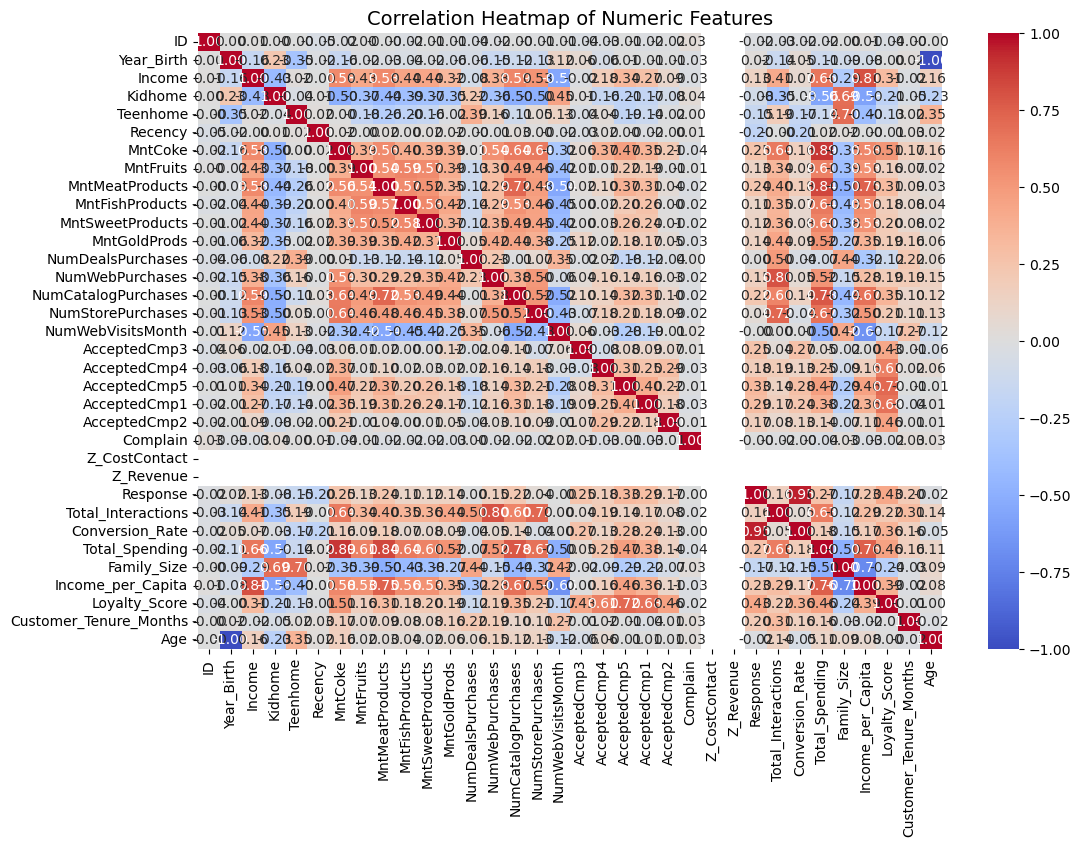

Highly correlated feature pairs (>0.9):
('Age', 'Year_Birth', -1.000000000000001)
('Conversion_Rate', 'Response', 0.9470990846589957)


In [13]:
# Cek korelasi fitur lain untuk menentukan fitur redundan

numeric_features = df.select_dtypes(include=['int64','float64'])
corr = numeric_features.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.show()

# Cari fitur yang punya korelasi tinggi (>0.9)
high_corr = set()
threshold = 0.9
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname1 = corr.columns[i]
            colname2 = corr.columns[j]
            high_corr.add((colname1, colname2, corr.iloc[i, j]))

print("Highly correlated feature pairs (>0.9):")
for pair in high_corr:
    print(pair)

In [14]:
# Drop fitur yang tidak diperlukan untuk clustering
drop_features = ["ID", "Year_Birth", "Dt_Customer", "Response", "Z_CostContact", "Z_Revenue"]

df_cluster = df.drop(columns=drop_features, errors="ignore")

- ID            : tidak relevan
- Year_Birth    : Mirip dengan Age, tetapi lebih praktis menggunakan Age
- Dt_Customer   : Tidak cocok untuk di encoding, tukar dengan tenure
- Response      : Nilainya Boolean, dapat membuat cluster menjadi bingung
- Z_CostContact : Tidak ada korelasi dengan yang lain (varians konstan)
- Z_Revenue     : Tidak ada korelasi dengan yang lain (varians konstan)

##### Melakukan feature encoding

In [17]:
cat_features = df_cluster.select_dtypes(include=['object', 'category']).columns.tolist()
print("Fitur kategorikal:", cat_features)

df_encoded = pd.get_dummies(df_cluster, columns=cat_features, drop_first=True)

df_encoded.head()

Fitur kategorikal: ['Education', 'Marital_Status', 'Recency_Segment', 'Preferred_Channel', 'Age_Group']


,Income,Kidhome,Teenhome,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,Marital_Status_Lajang,Marital_Status_Menikah,Recency_Segment_Old,Recency_Segment_Recent,Preferred_Channel_Store,Preferred_Channel_Web,Age_Group_30-39,Age_Group_40-49,Age_Group_50-59,Age_Group_60+
0,58138000.0,0,0,58,635000,88000,546000,172000,88000,88000,...,True,False,False,False,False,False,False,False,False,True
1,46344000.0,1,1,38,11000,1000,6000,2000,1000,6000,...,True,False,False,False,True,False,False,False,False,True
2,71613000.0,0,0,26,426000,49000,127000,111000,21000,42000,...,False,False,False,True,True,False,False,False,False,True
3,26646000.0,1,0,26,11000,4000,20000,10000,3000,5000,...,False,False,False,True,True,False,False,True,False,False
4,58293000.0,1,0,94,173000,43000,118000,46000,27000,15000,...,False,True,True,False,True,False,False,True,False,False


##### Melakukan standardisasi pada feature

In [18]:
df_use = df_encoded.copy()

num_cols = df_use.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df_use.select_dtypes(exclude=["int64", "float64"]).columns

scaler = StandardScaler()
df_scaled_num = scaler.fit_transform(df_use[num_cols])
df_scaled_num = pd.DataFrame(df_scaled_num, columns=num_cols, index=df_use.index)

df_final = pd.concat([df_scaled_num, df_use[cat_cols]], axis=1)

In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2240 non-null   float64
 1   Kidhome                  2240 non-null   float64
 2   Teenhome                 2240 non-null   float64
 3   Recency                  2240 non-null   float64
 4   MntCoke                  2240 non-null   float64
 5   MntFruits                2240 non-null   float64
 6   MntMeatProducts          2240 non-null   float64
 7   MntFishProducts          2240 non-null   float64
 8   MntSweetProducts         2240 non-null   float64
 9   MntGoldProds             2240 non-null   float64
 10  NumDealsPurchases        2240 non-null   float64
 11  NumWebPurchases          2240 non-null   float64
 12  NumCatalogPurchases      2240 non-null   float64
 13  NumStorePurchases        2240 non-null   float64
 14  NumWebVisitsMonth        2240

# Task 3
- *Upcoming